## ________________________________________ Task 3 ______________________________________ 


## ___________________________ Sales Prediction Using Python __________________________

Imports and Data Loading:

Libraries are imported for data manipulation (numpy, pandas), visualization (matplotlib, seaborn), model building (sklearn), and warnings suppression (warnings).
The dataset (advertising.csv) is loaded into a Pandas DataFrame (ad_data).


In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Suppress warnings (optional)
import warnings
warnings.filterwarnings('ignore')


#### Data Exploration and Visualization:

head() and info() methods are used to inspect the dataset.
pairplot and heatmap are generated to visualize relationships and correlations between variables.

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


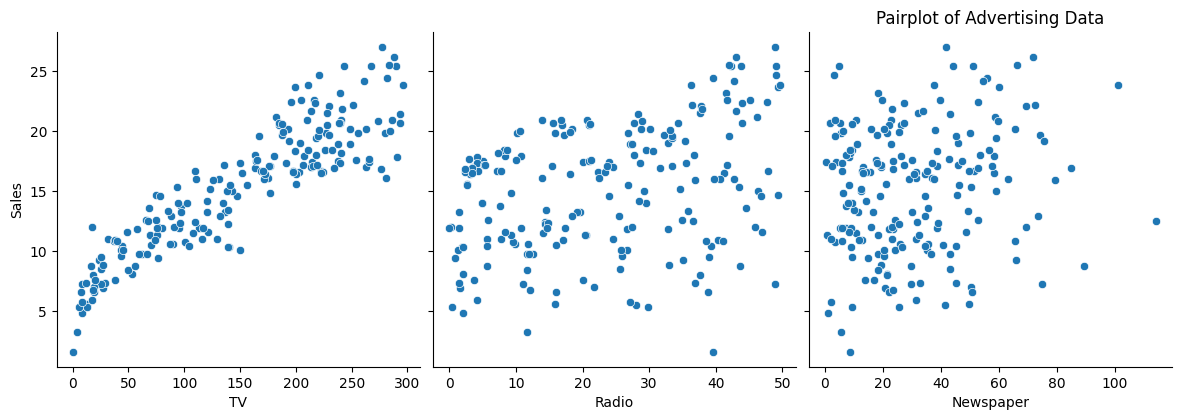

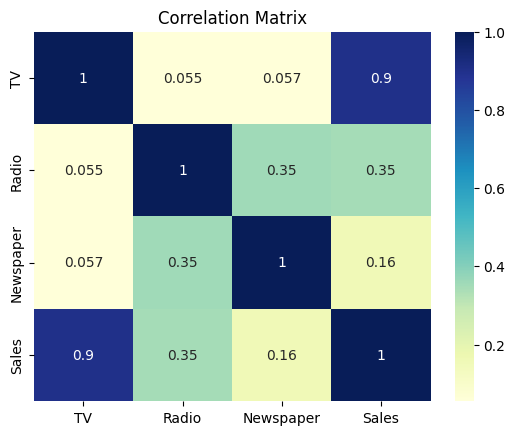

In [2]:

# Step 2: Load and explore the dataset
ad_data = pd.read_csv("advertising.csv")  # Load dataset
print(ad_data.head())  # Display first few rows
print(ad_data.info())  # Summary of the dataset

# Step 3: Visualize relationships between variables
sns.pairplot(ad_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.title('Pairplot of Advertising Data')
plt.show()

# Step 4: Calculate and visualize correlations
correlation_matrix = ad_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()


#### Data Preparation:

Predictor (X) and target (y) variables are defined.
Features (X) are standardized using StandardScaler.
The dataset is split into training and testing sets (X_train, X_test, y_train, y_test).

In [3]:
# Step 5: Prepare data for modeling
X = ad_data[['TV', 'Radio', 'Newspaper']]
y = ad_data['Sales']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)


#### Model Training and Hyperparameter Tuning:

Ridge Regression is implemented with hyperparameter tuning using GridSearchCV to find the best alpha parameter for regularization.

In [4]:
# Step 6: Hyperparameter tuning with Ridge Regression
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Define parameter grid
ridge_regressor = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

# Identify the best alpha parameter
best_alpha = ridge_regressor.best_params_['alpha']
print(f'Best alpha parameter: {best_alpha}')


Best alpha parameter: 1


In [5]:
# Step 7: Train the Ridge Regression model with the best alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

#### Model Evaluation:

The Ridge Regression model is trained on the training set (X_train, y_train) with the best alpha.
Predictions are made on the test set (X_test) and evaluation metrics (RMSE, MAE, R-squared, Adjusted R-squared) are calculated and printed.

In [6]:

# Step 8: Model evaluation
y_pred = ridge.predict(X_test)  # Predict on test set

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared: {r2:.4f}')


Root Mean Squared Error (RMSE): 1.6262
Mean Absolute Error (MAE): 1.2278
R-squared: 0.8652


In [7]:
# Calculate adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2:.4f}')

Adjusted R-squared: 0.8579


#### Visualization of Model Performance:

Actual vs Predicted Sales are visualized using a scatter plot.
Residuals are plotted against predicted sales to visualize the distribution of errors.


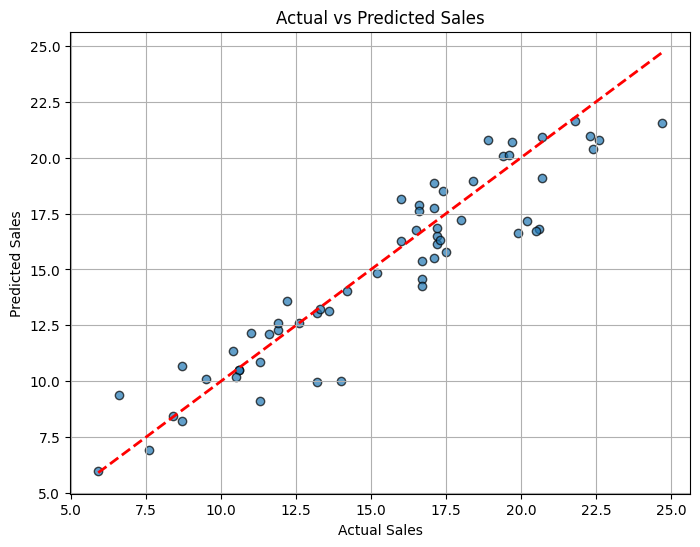

In [8]:

# Step 9: Visualize model performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()


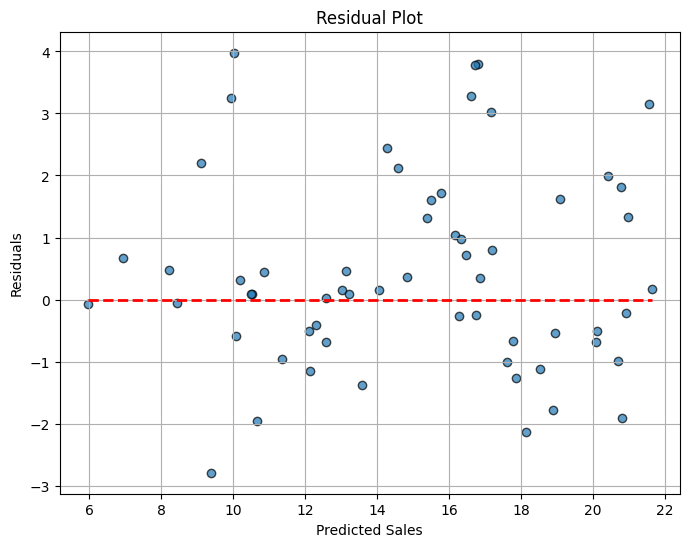

In [9]:

# Step 10: Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--', linewidth=2)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

#### Additional Metrics:

Mean Absolute Percentage Error (MAPE) is calculated as an additional metric to evaluate prediction accuracy.

In [10]:
# Step 11: Additional metrics
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

# Print additional metrics
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')

Mean Absolute Percentage Error (MAPE): 8.1156%
